In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import pareto
from sklearn.neighbors import KernelDensity

In [2]:
plt.rcParams["figure.figsize"] = (15,10)

# Question 7

Simulate $n$ samples from a given distribution $F$, and then use kernel density estimation to estimate the density.

**(a)** $F$ is normal $N(0, \sigma^2)$. Try a few different value for $\sigma^2$.

**(b)** $F$ is Pareto distributed as above. Try a few different values for parameters.

# Solution

## (a)

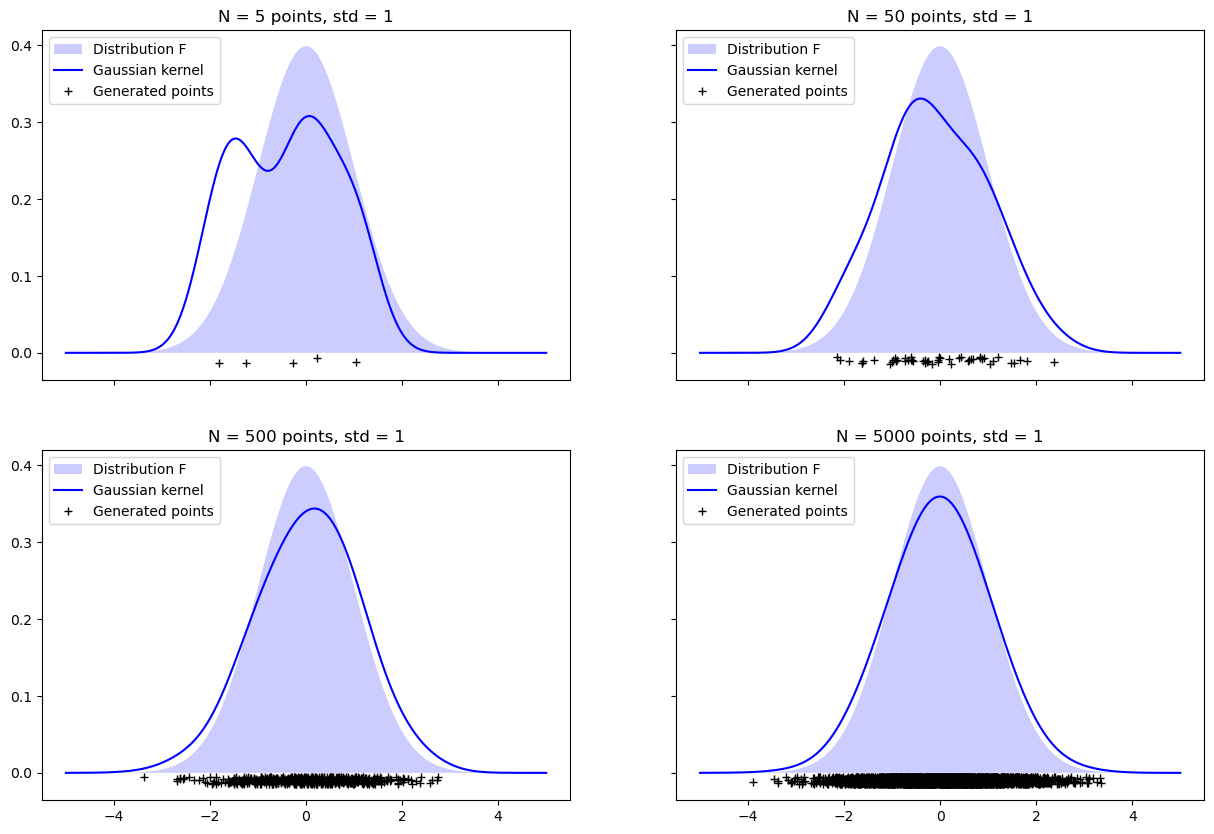

In [3]:
xs = np.linspace(-5, 5, 1000)[:, np.newaxis]

density = norm.pdf(xs)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

def KDEplots(N, loc, scale, subplot_axis_arg_a, subplot_axis_arg_b, color):
    
    # Define axis of the subplot
    axis = ax[subplot_axis_arg_a, subplot_axis_arg_b]
    
    # Generate samples
    x = np.random.normal(loc=loc,scale=scale,size=N)[:, np.newaxis]
    
    # Plot density F
    axis.fill(xs[:, 0], density, fc=color, alpha=0.2, label="Distribution F")
    
    # Kernel density estimation
    kde = KernelDensity(kernel="gaussian", bandwidth=0.5).fit(x)
    
    # Get KDE result
    log_dens = kde.score_samples(xs)
    
    # plot
    axis.plot(xs[:,0], np.exp(log_dens), color=color, label="Gaussian kernel")
    axis.plot(x[:, 0], -0.005 - 0.01 * np.random.random(x.shape[0]), "+k", label="Generated points")
    axis.set_title(f'N = {N} points, std = {scale}')
    axis.legend(loc="upper left")

loc=0
scale=1
color="blue"

KDEplots(5, loc, scale, 0, 0, color)
KDEplots(50, loc, scale, 0, 1, color)
KDEplots(500, loc, scale, 1, 0, color)
KDEplots(5000, loc, scale, 1, 1, color)

plt.show()

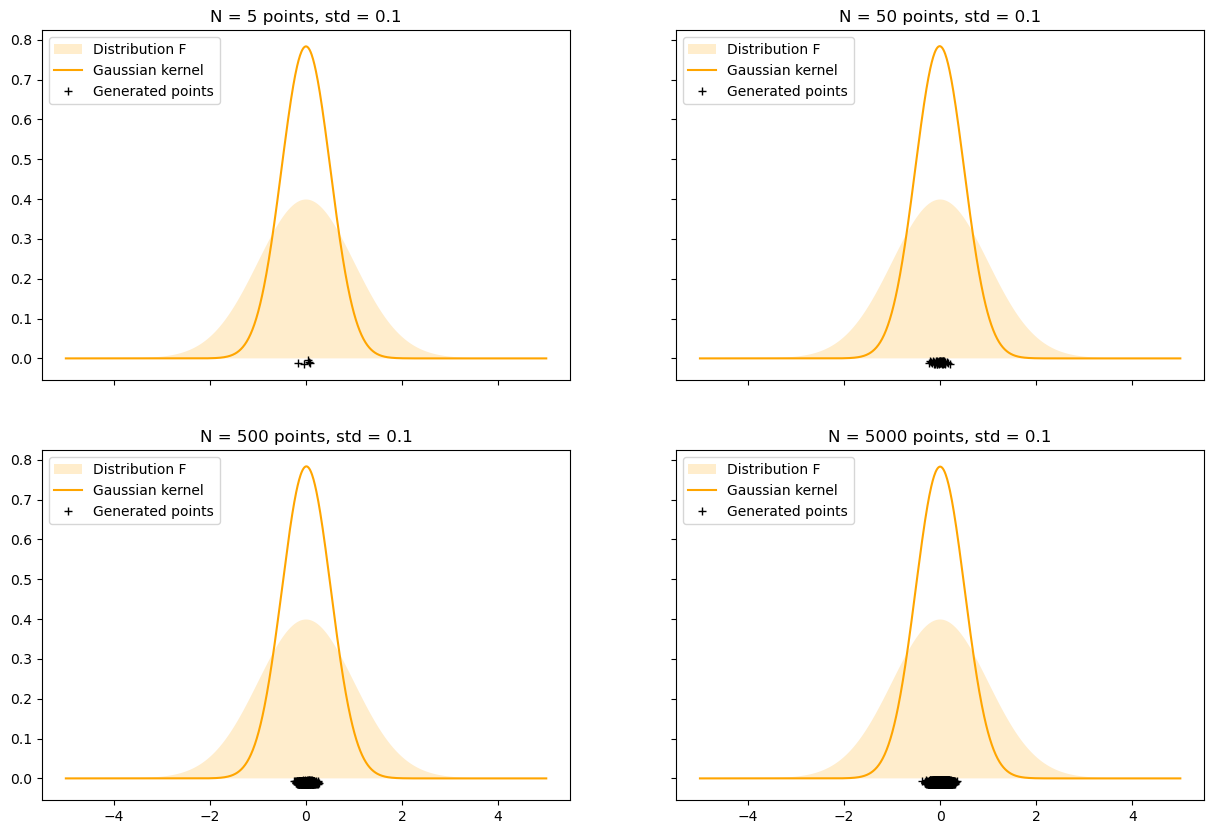

In [4]:
loc=0
scale=0.1
color="orange"
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

KDEplots(5, loc, scale, 0, 0, color)
KDEplots(50, loc, scale, 0, 1, color)
KDEplots(500, loc, scale, 1, 0, color)
KDEplots(5000, loc, scale, 1, 1, color)

plt.show()

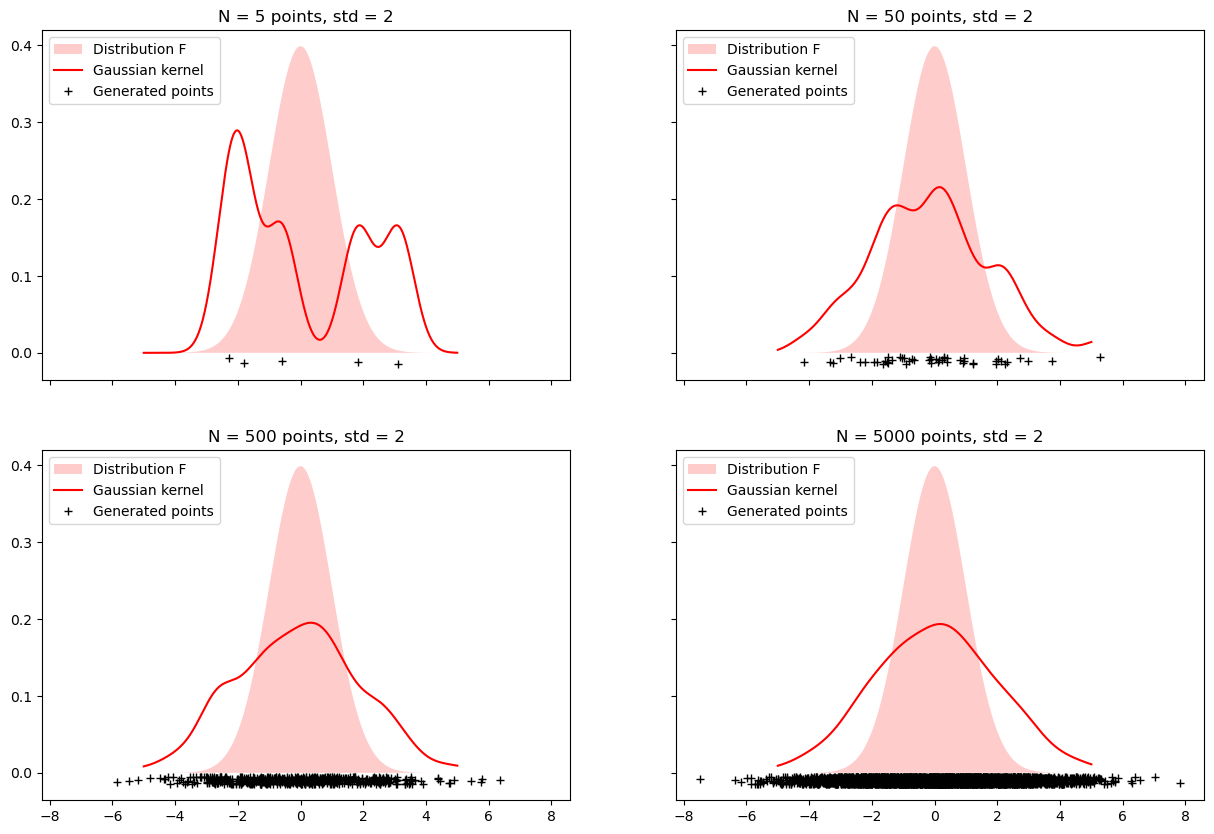

In [5]:
loc=0
scale=2
color="red"
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

KDEplots(5, loc, scale, 0, 0, color)
KDEplots(50, loc, scale, 0, 1, color)
KDEplots(500, loc, scale, 1, 0, color)
KDEplots(5000, loc, scale, 1, 1, color)

plt.show()

## (b)

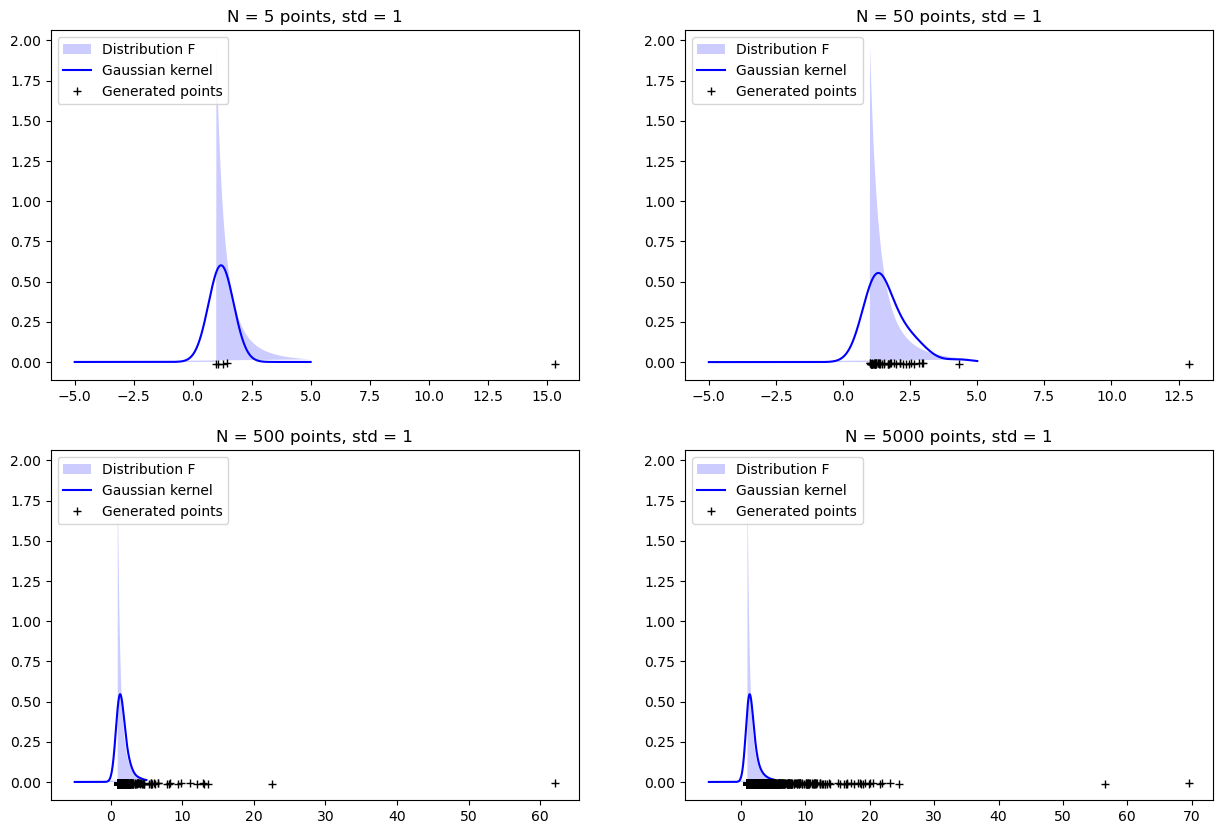

In [6]:
def KDEplots2(b, N, subplot_axis_arg_a, subplot_axis_arg_b, color):
    
    # Define axis of the subplot
    axis = ax[subplot_axis_arg_a, subplot_axis_arg_b]
    
    # Generate samples
    x = pareto.rvs(b, size=N)[:, np.newaxis]
    
    # Plot density F
    axis.fill(xs[:, 0], density, fc=color, alpha=0.2, label="Distribution F")
    
    # Kernel density estimation
    kde = KernelDensity(kernel="gaussian", bandwidth=0.5).fit(x)
    
    # Get KDE result
    log_dens = kde.score_samples(xs)
    
    # plot
    axis.plot(xs[:,0], np.exp(log_dens), color=color, label="Gaussian kernel")
    axis.plot(x[:, 0], -0.005 - 0.01 * np.random.random(x.shape[0]), "+k", label="Generated points")
    axis.set_title(f'N = {N} points, std = {scale}')
    axis.legend(loc="upper left")

loc=0
scale=1
b=2
color="blue"

density = pareto.pdf(xs, b)

fig, ax = plt.subplots(2, 2, sharex=False, sharey=False)

KDEplots2(b, 5, 0, 0, color)
KDEplots2(b, 50, 0, 1, color)
KDEplots2(b, 500, 1, 0, color)
KDEplots2(b, 5000, 1, 1, color)

plt.show()